In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
len(mnist.train.images)

55000

In [8]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
type(mnist.train.images[0])

numpy.ndarray

In [10]:
len(mnist.train.images[0])

784

In [11]:
len(mnist.train.images)

55000

In [23]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
mnist.train.images.shape

(55000, 784)

In [25]:
mnist.train.images[2].shape

(784,)

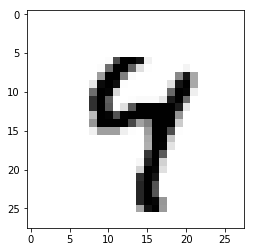

In [26]:
mnist.train.images[2].reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mnist.train.images[2].reshape(28,28), cmap = 'Greys')

In [27]:
# now lets quickly set the parameters on which our algorithm is going to predict the values

learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_hidden_1 = 256
n_hidden_2 = 256
n_inputs = 784
n_classes = 10
n_samples = mnist.train.num_examples

In [29]:
# TENSORFLOW GRAPH INPUTS

x = tf.placeholder("float", [None, n_inputs])
y = tf.placeholder("float", [None, n_classes])

In [30]:
# now we wanna create our multilayer_perceptron function, which takes three argumens:
# x --> our inputs
# w --> weights
# b -- > bieases

def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [32]:
# now we are goning to go ahead and define our weights and biases

weights = {
    'h1': tf.Variable(tf.random_normal([n_inputs, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [33]:
# similarly, for biases we have

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [34]:
pred = multilayer_perceptron(x, weights, biases)

In [38]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(pred,y))  # --> predicts the difference b/w perdicted values and true values
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost) # --> optimizes the difference b/w predicted and true values

In [39]:
xsamp, ysamp = mnist.train.next_batch(1) # --> providing the next_batch of 100 values to our algorithm

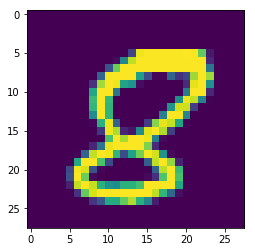

In [41]:
plt.imshow(xsamp.reshape(28,28))

In [42]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [45]:
# now it's time to run the session, for this we are gonna all Session() method off of tensorflow

sess = tf.InteractiveSession()

In [47]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [51]:
# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=-29053262.2527
Epoch: 2 cost=-461642736.7127
Epoch: 3 cost=-1863223824.4073
Epoch: 4 cost=-4572740745.3091
Epoch: 5 cost=-8788184625.3382
Epoch: 6 cost=-14655827541.6436
Epoch: 7 cost=-22286259626.3564
Epoch: 8 cost=-31778065296.2909
Epoch: 9 cost=-43226501604.0728
Epoch: 10 cost=-56749382317.1491
Epoch: 11 cost=-72404614639.2436
Epoch: 12 cost=-90371126514.0363
Epoch: 13 cost=-110686493409.2799
Epoch: 14 cost=-133508426658.9090
Epoch: 15 cost=-158916983953.2220
Model has completed 15 Epochs of Training


In [52]:
# now we want to evaluate our model on the basis of predictions made

correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [53]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [54]:
correct_predictions_float_values = tf.cast(correct_predictions, 'float')

In [56]:
print(correct_predictions_float_values[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [57]:
# now we wanna go ahead and grab the mean of our elements across tensor

accuracy = tf.reduce_mean(correct_predictions_float_values)

In [58]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [60]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
print('Accuracy: ', accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy:  0.098


In [65]:
# SEEMS LIKE OUR MODEL IS PREDICTING PRETTY WELL, AND ACHIEVES THE ACCURAY OF AROUND 99% WITH TRAINING_EPOCHS = 15 WHICH IS NOT BAT AT ALL <<